***8.Handling Images***

In [1]:
import cv2
print(cv2.__version__)

4.12.0


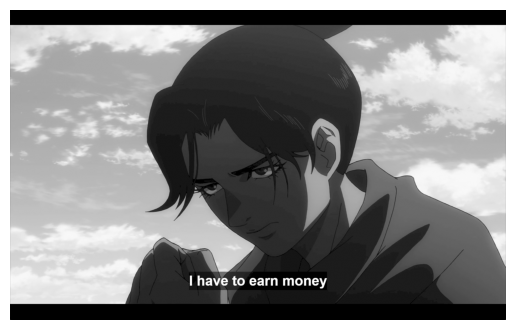

In [2]:
from matplotlib import pyplot as plt
import numpy as np
images=cv2.imread("simulated_d.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(images,cmap="gray"), plt.axis("off")
plt.show()

In [3]:
#show data type

type(images)
np.ndarray
images

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [28,  0,  0, ...,  0,  0, 28],
       [28, 34,  0, ...,  0, 34, 28],
       [28, 28, 28, ..., 28, 28, 28]], dtype=uint8)

In [4]:
images.shape

(1200, 1920)

In [5]:
images[1000,900]

np.uint8(78)

In [6]:
image_bgr=cv2.imread("simulated_d.png",cv2.IMREAD_COLOR)
image_bgr[0,0]


array([3, 2, 2], dtype=uint8)

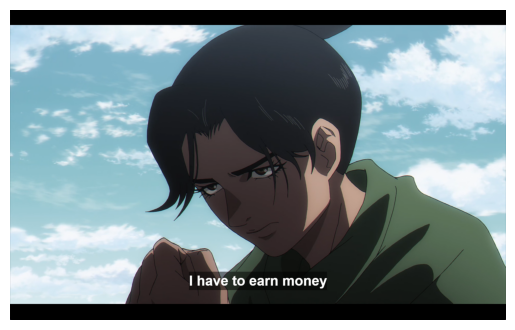

In [7]:
image_bgr=cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(image_bgr), plt.axis("off")
plt.show()

In [8]:
#8.2 Saving Images
image=cv2.imread("simulated_d.png",cv2.IMREAD_GRAYSCALE)
cv2.imwrite("simulated_d_gray.png",image)

True

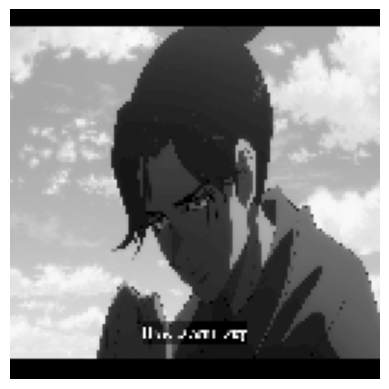

In [9]:
#8.3 Resizing Images 
image=cv2.imread("simulated_d.png",cv2.IMREAD_GRAYSCALE)
image_resized=cv2.resize(image,(128,128))
plt.imshow(image_resized,cmap="gray"), plt.axis("off")
plt.show()

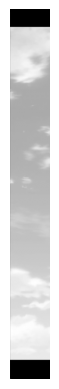

In [10]:
#8.4 Cropping Images 
image=cv2.imread("simulated_d.png",cv2.IMREAD_GRAYSCALE)
image_cropped=image[:,:128]
plt.imshow(image_cropped,cmap="gray"), plt.axis("off")
plt.show()


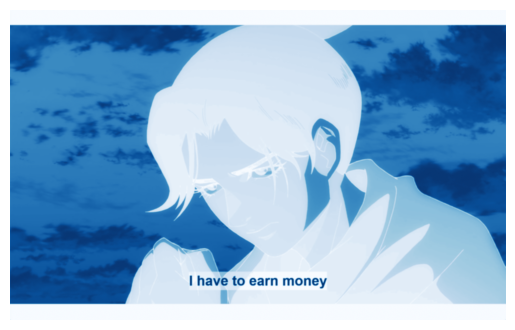

In [14]:
#8.5 Blurring images
image_blurry=cv2.blur(images,(5,5))
plt.imshow(image_blurry,cmap="Blues"), plt.axis("off")
plt.show()

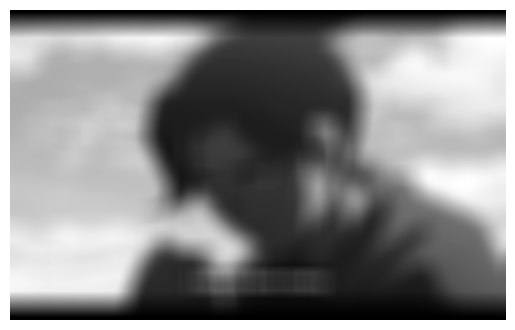

In [17]:
#to highlight the effect of kernel size 
image_blurry2=cv2.blur(images,(100,100))
plt.imshow(image_blurry2,cmap="gray"), plt.axis("off")
plt.show()

In [18]:
kernel=np.ones((5,5),np.float32)/25.0
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

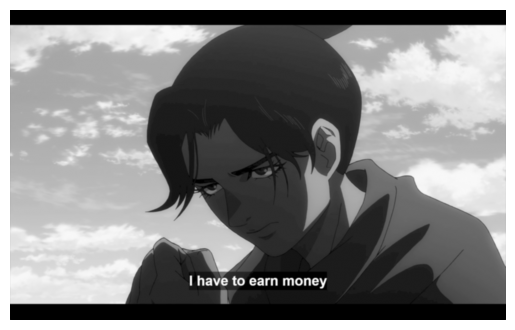

In [19]:
image_kernel=cv2.filter2D(images,-1,kernel)
plt.imshow(image_kernel,cmap="gray"), plt.axis("off")
plt.show()

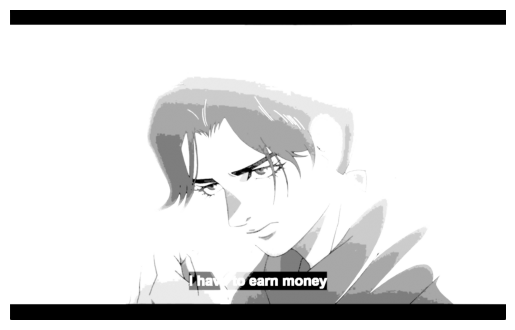

In [27]:
#8.6 Sharpening images
images=cv2.imread("simulated_d.png",cv2.IMREAD_GRAYSCALE)
kernel=np.array([[2,-1,2],[-1,2,-1],[2,-1,2]])

image_sharp=cv2.filter2D(images,-1,kernel)
plt.imshow(image_sharp,cmap="gray"), plt.axis("off")
plt.show()

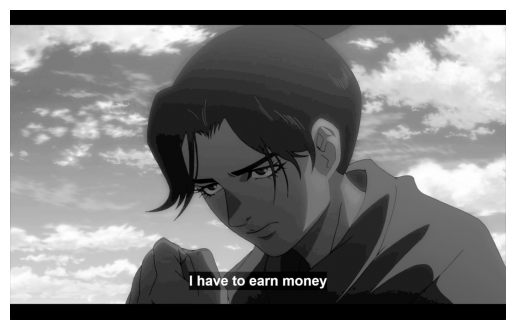

In [30]:
#8.7 Enhancing Contrast

# Read as grayscale since equalizeHist only works with single-channel images
images=cv2.imread("simulated_d.png", cv2.IMREAD_GRAYSCALE)
image_enhanced=cv2.equalizeHist(images)
plt.imshow(image_enhanced, cmap='gray'), plt.axis("off")
plt.show()

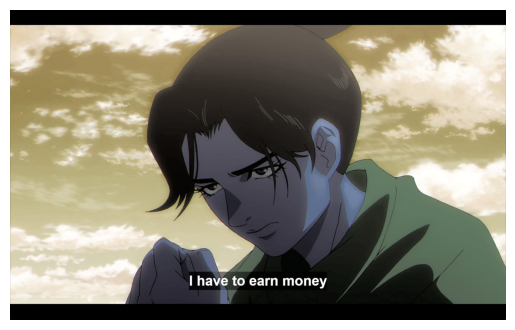

In [31]:
images_bgr=cv2.imread("simulated_d.png")
images_yuu=cv2.cvtColor(images_bgr, cv2.COLOR_BGR2YUV)
images_yuu[:,:,0]=cv2.equalizeHist(images_yuu[:,:,0])
images_output=cv2.cvtColor(images_yuu, cv2.COLOR_YUV2BGR)
plt.imshow(images_output), plt.axis("off")
plt.show()

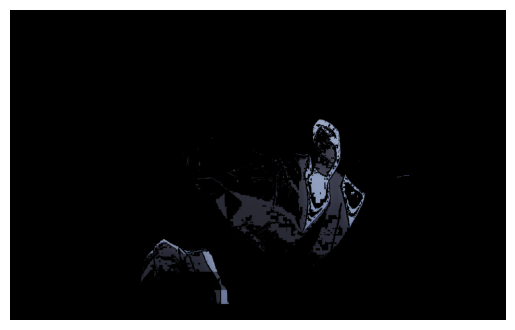

In [32]:
#8.8 Isolating colors
images=cv2.imread("simulated_d.png")
hsv_image=cv2.cvtColor(images,cv2.COLOR_BGR2HSV)
lower_bound=np.array([0,50,50])
upper_bound=np.array([10,255,255])
mask=cv2.inRange(hsv_image,lower_bound,upper_bound)
result=cv2.bitwise_and(images,images,mask=mask)
plt.imshow(result), plt.axis("off")
plt.show()

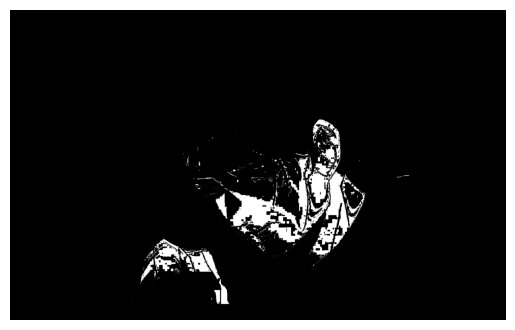

In [33]:
plt.imshow(mask,cmap='gray'),plt.axis("off")
plt.show()

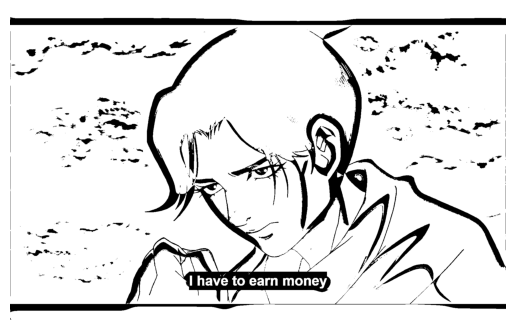

In [34]:
# 8.9 Binarizing Images
image_grey=cv2.imread("simulated_d.png",cv2.IMREAD_GRAYSCALE)
max_output_value=255
neighborhood_size=99
subtract_from_mean=10
image_binarized=cv2.adaptiveThreshold(image_grey,max_output_value,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,neighborhood_size,subtract_from_mean)
plt.imshow(image_binarized,cmap="gray"), plt.axis("off")    
plt.show()

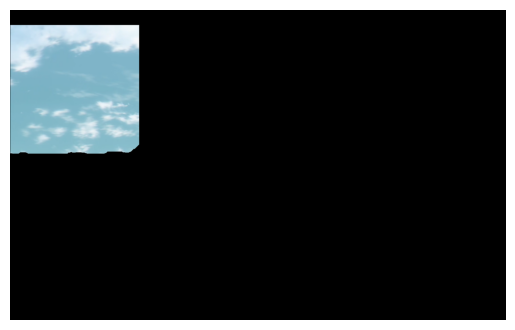

In [39]:
#8.10 Removing Backgrounds 
image_bgr=cv2.imread("simulated_d.png")
image_rgb=cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
rectangle=(0,56,500,500)
mask=np.zeros(image_rgb.shape[:2],np.uint8)
bgdModel=np.zeros((1,65),np.float64)
fgdModel=np.zeros((1,65),np.float64)
cv2.grabCut(image_rgb,mask,rectangle,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2=np.where((mask==2)|(mask==0),0,1).astype('uint8')
image_rgb_nobg=image_rgb*mask2[:,:,np.newaxis]
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()


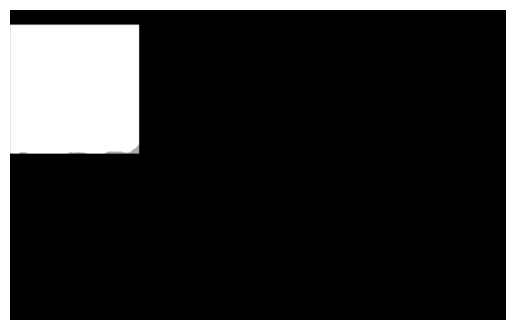

In [40]:
plt.imshow(mask,cmap="gray"), plt.axis("off")
plt.show()

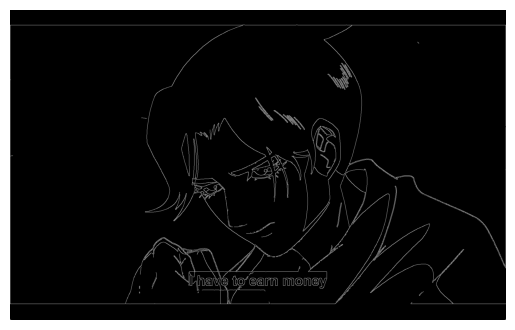

In [41]:
#8.11 Detecting Edges
image_gray=cv2.imread("simulated_d.png",cv2.IMREAD_GRAYSCALE)
median_intensity=np.median(image_gray)
lower_threshold=int(max(0,0.7*median_intensity))
upper_threshold=int(min(255,1.3*median_intensity))
edges=cv2.Canny(image_gray,lower_threshold,upper_threshold)
plt.imshow(edges,cmap="gray"), plt.axis("off")
plt.show()

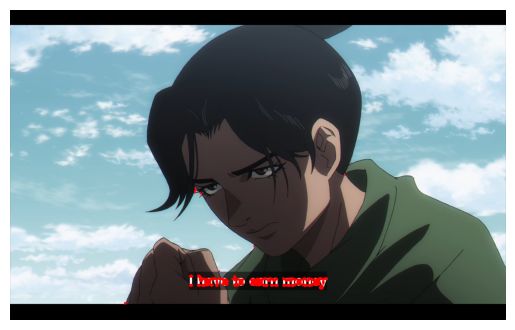

In [52]:
#8.2 Detecting Corners
image_bgr=cv2.imread("simulated_d.png")
image_gray=cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)
images_gray=np.float32(image_gray)
block_size=10
aperture_size=29
free_parameter=0.04
detector_responses=cv2.cornerHarris(images_gray,block_size,aperture_size,free_parameter)
threshold = 0.02  # Lower threshold for more sensitivity
image_bgr[detector_responses > threshold * detector_responses.max()] = [0, 0, 255]  # Mark corners in red
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)), plt.axis("off")
plt.show()
detector_responses=cv2.dilate(detector_responses,None)


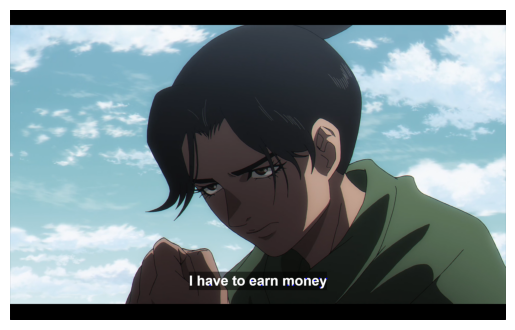

In [55]:
images_bgr=cv2.imread("simulated_d.png")
images_gray=cv2.cvtColor(images_bgr, cv2.COLOR_BGR2GRAY)
corners_to_detect=10
minimum_distance=20
minimum_quality=0.05
corners=cv2.goodFeaturesToTrack(images_gray,corners_to_detect,minimum_quality,minimum_distance)
corners=np.int32(corners)
for corner in corners:
    x,y = corner[0]

    cv2.circle(images_bgr,(x,y),3,255,-1)
    image_rgb=cv2.cvtColor(images_bgr,cv2.COLOR_BGR2RGB)   
plt.imshow(image_rgb), plt.axis("off")
plt.show()


In [56]:
#8.13 Creating Features for ML
iamges=cv2.imread("simulated_d.png",cv2.IMREAD_GRAYSCALE)
image_10x10=cv2.resize(iamges,(10,10))
image_10x10.flatten()

array([219, 230, 246, 242, 167,  67,  67, 173, 172, 244, 214, 170, 171,
       171,  50,  53,  60, 172, 187, 238, 167, 170, 179,  39,  39,  43,
        46, 227, 228, 238, 172, 177, 238,  28,  28,  33,  43, 188, 212,
       224, 177, 222, 198,  57,  59,  28,  74, 191, 189, 178, 186, 184,
       184,  21,  50,  53,  68, 112, 244, 244, 192, 192, 192, 180,  34,
        46,  56,  34, 107, 229, 231, 244, 230, 206, 206,  43,  45,  87,
        96, 102, 226, 246, 232,  28,  43,   0,  28,  28,  34,  93,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

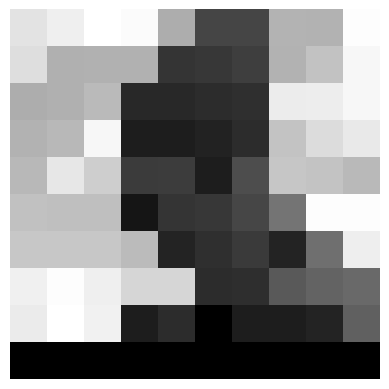

In [57]:
plt.imshow(image_10x10,cmap="gray"), plt.axis("off")
plt.show()

In [61]:
#8.14 Encoding Mean Color as Features
images=cv2.imread("simulated_d.png")
channels=cv2.mean(images)
observations=np.array([(channels[2],channels[1],channels[0])])
observations



array([[106.53537109, 123.21853646, 127.67929861]])

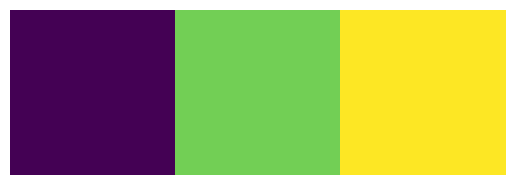

In [65]:
plt.imshow(observations), plt.axis("off")
plt.show()  

In [67]:
#8.15 Encoding Color Histograms as Features
images_bgr=cv2.imread("simulated_d.png",cv2.IMREAD_COLOR)
images_rgb=cv2.cvtColor(images_bgr,cv2.COLOR_BGR2RGB)
features=[]
colors=('r','g','b')
for i, color in enumerate(colors):
    histogram=cv2.calcHist([images_rgb],[i],None,[256],[0,256])
    histogram=histogram.flatten()
    features.extend(histogram)
observations=np.array(features).flatten()
observations[0:5]

array([2.30288e+05, 1.70000e+01, 1.50000e+01, 3.80000e+01, 1.26000e+02],
      dtype=float32)

In [68]:
images_rgb[0,0]

array([2, 2, 3], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

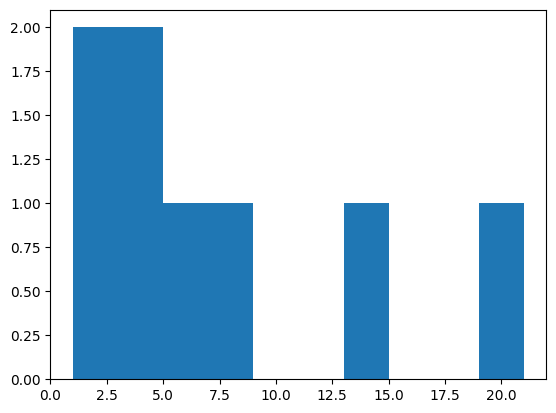

In [70]:
import pandas as pd
dataframe=pd.Series([1,2,3,4,5,8,13,21])
dataframe.hist(grid=False)
plt.show

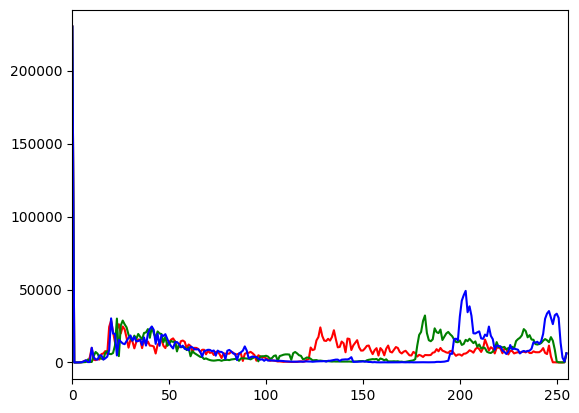

In [71]:
colors=('r','g','b')
for i, channel in enumerate(colors):
    histogram=cv2.calcHist([images_rgb],[i],None,[256],[0,256])
    plt.plot(histogram,color=channel)
    plt.xlim([0,256])